In [35]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

## Project Pitch

https://github.com/rkcatipon/Content-Analysis-ArRe

At the behest of the Atlantic Council, a think tank with ties to NATO and U.S. defense groups, a swath of Facebook pages that were said to be spreading disinformation were “purged” from the site. However, many of these pages were critical of U.S. foreign policy, leading to concerns about rising censorship on the social media platform. In this project, we would like to study the Facebook purge using text analysis methods. Specifically, we will explore whether the presence of certain topics related to national security and the positions media outlets take on them can be correlated with an increased risk of censorship.

In order to detect these topics, we will collect and analyze text from the purged Facebook pages using methods such as LDA topic modeling and STM. Once topics related to foreign policy within the censored pages emerge, then we can compare these findings with the News dataset in the Davies Corpora to understand the semantic differences between the purged pages and mainstream media. We will, therefore, be able to model which topics trigger potential censorship.

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. This could include one of the Davies corpora or some other you have constructed. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </span>

In [3]:
#navigate
corpus_name = "/Users/reginacatipon/Documents/2019-2020 Graduate School/Q2/SOCI 40133/GloWbE"


In [4]:
#load corpus
def loadcorpus(corpus_name, corpus_style="text"):
    texts_raw = {}
    for file in os.listdir(corpus_name + "/"):
        if corpus_style in file:
            print(file)
            zfile = zipfile.ZipFile(corpus_name + "/" + file)
            for file in zfile.namelist():
                texts_raw[file] = []
                with zfile.open(file) as f:
                    for line in f:
                        texts_raw[file].append(line)
    return texts_raw

# set corpus
news_raw = loadcorpus(corpus_name)

text_sg_jsu.zip
text_jm_bsh.zip
text_ng_kdt.zip
text_gh_msk.zip
text_my_wme.zip
text_bd_lws.zip
text_lk_ssy.zip
text_tz_niy.zip
text_za_asl.zip
text_us_blog_jfy.zip
text_in_ksi.zip
text_au_kso.zip
text_ph_jop.zip
text_nz_poj.zip
text_gb_blog_akq.zip
text_ca_usi.zip
text_us_genl_ksl.zip
text_pk_jww.zip
text_ie_ksu.zip
text_gb_genl_lsp.zip
text_ke_aua.zip
text_hk_wjj.zip


In [5]:
# preview news_raw content
type(news_raw)
print(list(news_raw.keys())[0:9])

news_raw["w_sg_g04.txt"][5:]

['w_sg_b01.txt', 'w_sg_b02.txt', 'w_sg_b03.txt', 'w_sg_b04.txt', 'w_sg_b05.txt', 'w_sg_g01.txt', 'w_sg_g02.txt', 'w_sg_g03.txt', 'w_sg_g04.txt']


[b"##1015635 <p> Mr Julian Tan is the Chief Executive Officer of 701Search Pte Ltd , a joint venture company between Singapore Press Holdings ( SPH ) and Norway ? s Schibsted Media Group . He is responsible for the strategic development and growth of the company in Southeast Asia and Greater China . <p> Prior to his appointment as CEO of 701Search , Mr Tan was the Chief Operating Officer of SPH Search Pte Ltd where he was part of the core team that built Singapore ? s local search and directory engine , rednano . Before that , he was in the Corporate Development Division of SPH where he played a pivotal role in developing strategies and business plans for SPH ? s push into the internet and mobile worlds . <p> Mr Tan started his career as a broadcast journalist for the Television Corporation of Singapore and was subsequently headhunted by SPH to be part of a pioneer team that set up two TV channels in 2000 . He was appointed Vice President , Business Planning and Operations . <p> Mr Tan

In [175]:
# clean text
def clean_raw_text(raw_texts):
    clean_texts = []
    for text in raw_texts:
        try:
            text = text.decode("utf-8")
            clean_text = text.replace("<p>", "").replace("I\'", "I'").replace(" \'m", "'m").replace(" \'ll", "'ll").replace(" \'re", "'re").replace(" \'s", "'s").replace(" \'re", "'re").replace("It\'s'","It's").replace(" n\'t", "n't").replace(" \'ve", "'ve").replace(" /'d", "'d").replace("<, h, >", "")
            clean_texts.append(clean_text)
        except AttributeError:
            # print("ERROR CLEANING")
            # print(text)
            continue
        except UnicodeDecodeError:
            # print("Unicode Error, Skip")
            continue
    return clean_texts

clean_sg = clean_raw_text(news_raw["w_sg_g04.txt"])


In [7]:
# inspect outcome
clean_sg[2]

'##1015631  Project Aim : To facilitate women entrepreneurs in rural Rajasthan , India , to educate and sell hygiene products through a mobile application  What or who is your greatest source of inspiration ?  For many years , my inclination to do something meaningful for the less privileged was limited to monetary donations to various social causes , but deep down in my heart , I felt the need to physically provide my services to causes that help to uplift the poor . Eventually , I took the plunge of leaving the corporate world to do something meaningful for society , to share my knowledge and skill sets with others who have not had the opportunity to access the same .  Why do you think women\'s empowerment is important ?  I believe that women can and should have a fundamental role in the development of sustainable livelihoods . Women are the main victims of worldwide poverty , thus preventing societies from fully achieving their development potential . By creating and supporting entr

In [8]:
clean_sg = clean_raw_text(news_raw["w_sg_g04.txt"])

In [9]:
nlp = spacy.load("en")

In [10]:
# tokenize function
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [11]:
# tokenize clean
word_tokenize(clean_sg[2])

['1015631',
 'Project',
 'Aim',
 'To',
 'facilitate',
 'women',
 'entrepreneurs',
 'in',
 'rural',
 'Rajasthan',
 'India',
 'to',
 'educate',
 'and',
 'sell',
 'hygiene',
 'products',
 'through',
 'a',
 'mobile',
 'application',
 'What',
 'or',
 'who',
 'is',
 'your',
 'greatest',
 'source',
 'of',
 'inspiration',
 'For',
 'many',
 'years',
 'my',
 'inclination',
 'to',
 'do',
 'something',
 'meaningful',
 'for',
 'the',
 'less',
 'privileged',
 'was',
 'limited',
 'to',
 'monetary',
 'donations',
 'to',
 'various',
 'social',
 'causes',
 'but',
 'deep',
 'down',
 'in',
 'my',
 'heart',
 'I',
 'felt',
 'the',
 'need',
 'to',
 'physically',
 'provide',
 'my',
 'services',
 'to',
 'causes',
 'that',
 'help',
 'to',
 'uplift',
 'the',
 'poor',
 'Eventually',
 'I',
 'took',
 'the',
 'plunge',
 'of',
 'leaving',
 'the',
 'corporate',
 'world',
 'to',
 'do',
 'something',
 'meaningful',
 'for',
 'society',
 'to',
 'share',
 'my',
 'knowledge',
 'and',
 'skill',
 'sets',
 'with',
 'others',
 

In [12]:
#word counter
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pd.DataFrame(countsForFrame)

In [13]:
#word counter
countedWords = wordCounter(word_tokenize(clean_sg[2]))
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:100]

word  count
37             the     65
3               to     64
12             and     58
5            women     46
27              of     35
..             ...    ...
2              aim      3
230       favorite      3
297           food      3
363       strength      3
231  inspirational      3

[100 rows x 2 columns]

In [14]:
# tokenize text and cast to list
tokens = list(word_tokenize(clean_sg[2]))

tokens

['1015631',
 'Project',
 'Aim',
 'To',
 'facilitate',
 'women',
 'entrepreneurs',
 'in',
 'rural',
 'Rajasthan',
 'India',
 'to',
 'educate',
 'and',
 'sell',
 'hygiene',
 'products',
 'through',
 'a',
 'mobile',
 'application',
 'What',
 'or',
 'who',
 'is',
 'your',
 'greatest',
 'source',
 'of',
 'inspiration',
 'For',
 'many',
 'years',
 'my',
 'inclination',
 'to',
 'do',
 'something',
 'meaningful',
 'for',
 'the',
 'less',
 'privileged',
 'was',
 'limited',
 'to',
 'monetary',
 'donations',
 'to',
 'various',
 'social',
 'causes',
 'but',
 'deep',
 'down',
 'in',
 'my',
 'heart',
 'I',
 'felt',
 'the',
 'need',
 'to',
 'physically',
 'provide',
 'my',
 'services',
 'to',
 'causes',
 'that',
 'help',
 'to',
 'uplift',
 'the',
 'poor',
 'Eventually',
 'I',
 'took',
 'the',
 'plunge',
 'of',
 'leaving',
 'the',
 'corporate',
 'world',
 'to',
 'do',
 'something',
 'meaningful',
 'for',
 'society',
 'to',
 'share',
 'my',
 'knowledge',
 'and',
 'skill',
 'sets',
 'with',
 'others',
 

In [15]:
import nltk

In [16]:
# nltk - Concordance Index, overlap
newsText = nltk.Text(tokens)
newsIndex = nltk.text.ConcordanceIndex(newsText) 
newsIndex.print_concordance('women')

Displaying 25 of 42 matches:
1015631 Project Aim To facilitate women entrepreneurs in rural Rajasthan Ind
 to access the same Why do you think women 's empowerment is important I believ
owerment is important I believe that women can and should have a fundamental ro
ng entrepreneurial opportunities for women I believe that women can be lifted o
portunities for women I believe that women can be lifted on the economy while p
ty How will you change the world for women and girls We believe that our mobile
positive impact in the lives of many women and girls living in rural areas This
le application will initially be for women entrepreneurs in rural Rajasthan The
ag We hope to impact over 10 million women over the next five years What can ot
ther people do to help disadvantaged women and girls Despite the existence of m
f many organizations that strive for women 's empowerment there is still a need
a greater impact in the lives of the women and girls of this world Why do you t
reneurship is 

In [17]:
newsText.common_contexts(['women'])

facilitate_entrepreneurs think_'s that_can livelihoods_are for_i
for_and many_and for_entrepreneurs million_over disadvantaged_and
for_'s the_and empower_we empowering_through rural_while more_in
that_and for_in the_who important_are


/Users/reginacatipon/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/reginacatipon/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/reginacatipon/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/reginacatipon/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/reginacatipon/anaconda3/lib/python3.7/_collections_ab

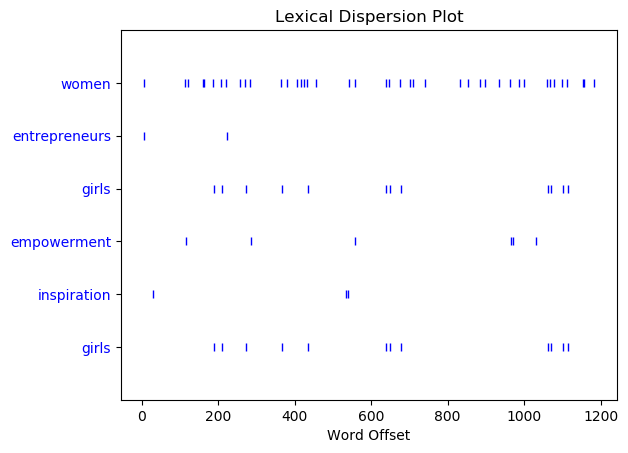

In [18]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
newsText.dispersion_plot(['women','entrepreneurs', 'girls', 'empowerment' ,'inspiration', 'girls'])
sns.set() #Re-enabling seaborn|

In [23]:
# getting files from Davies news corpus
zfile = zipfile.ZipFile(corpus_name + "/sources.zip")
source = []

In [24]:
for file in zfile.namelist():
    with zfile.open(file) as f:
        for line in f:
            source.append(line)

In [188]:
# inspect output
source[:3]

[b'textID\t#words\tcountry genre\tURL\ttitle\r\n',
 b'-----\t-----\t-----\t-----\t-----\r\n',
 b'3729937\t353\tAU B \thttp://0mashengw0q.biztro.com.au/2012/11/26/cheap-oakley-for-salesale-replica-oakleyoakley-half-wire-20/\tCheap Oakley For Sale,Sale Replica Oakley,Oakley Half Wire 20\r\n']

In [310]:
# tokenizing text and creating a dictionary with ID as key
news_texts = {}
for files in news_raw:
    if len(news_texts) > 2:
        break
    news = clean_raw_text(news_raw[files][1:])
    for article in news:
        txts = lucem_illud_2020.word_tokenize(article)
        try:
            news_texts[txts[0][2:]] = txts[1:]
        except IndexError:
            continue
            

In [341]:
news = clean_raw_text(news_raw[files][1:])


In [315]:
#create df
article_df = pd.DataFrame(columns=["Text ID", "Country", "URL", "Title", "Tokenized Texts"])


In [316]:
#[b'textID\t#words\tcountry genre\tURL\ttitle\r\n']
# place news articles into df

for news in source[3:]:
    try:
        tid, total_words, country, url, title = news.decode("utf-8").split("\t")
    except UnicodeDecodeError:
        continue
    try:
        article_df[tid.strip()] = [title.strip(), country.strip(), news_texts[tid.strip()] ]
    except KeyError:
        continue
        

In [317]:
#clean up df
article_df = article_df.T
article_df = article_df.rename(columns={0:"Title", 1:"Country Genre", 2: "Tokenized_Text"})
article_df = article_df.dropna()

In [318]:
# preview df

article_df.sort_index(axis=0)

Title Country Genre  \
22600  Line Ups: How Police Choose People To Be In A ...          AU G   
22602  Everything you want to know about nutrition - ...          IN G   
22612  TD Bank Financial Group - Corporate Informatio...          CA G   
22615      The End of the Golden Weather | Hollywood.com          IN G   
22616                    Empirica Research :: Leadership          AU G   
...                                                  ...           ...   
38712    Questions And Answers - Veterans Affairs Canada          CA G   
38713                     Tails of the City Pet Services          CA G   
38714  Django Unchained and Inglourious Basterds Are ...          US G   
38716  Children's Books - Reviews - Up and Down | BfK...          GB G   
38717  Linda Lalande, executive director of the Immig...          CA G   

                                          Tokenized_Text  
22600  [Investments, either, stocks, bonds, or, other...  
22602  [<, h, >, Do, Women, REALLY, Want, Sex, as, Mu...  
22612  [<, h, >, Blog, <, h, >, Most, agent, complain...  
22615  [<, h, >, This, is, my, Biography, It, 's, an,...  
22616  [Hey, everyone, By, this, time, I, should, be,...  
...                                                  ...  
38712  [I, can, barely, believe, it, As, of, now, mos...  
38713  [<, h, >, Right, From, the, Start, This, is, C...  
38714  [Education, is, something, close, to, the, hea...  
38716  [<, h, >, For, A, Better, Singapore, <, h, >, ...  
38717  [<, h, >, For, A, Better, Singapore, <, h, >, ...  

[1874 rows x 3 columns]

In [346]:
# from the one article, let's also put into a df in case we want a smaller dataset

fulltext_df = pd.DataFrame(news)
fulltext_df = fulltext_df.rename(columns={0: "text"})


text
0     ##3522600  Investments ( either stocks , bonds...
1     ##3522601 <h> Monday , February 06 , 2006 <h> ...
2     ##3522602 <h> Do Women REALLY Want Sex as Much...
3     ##3522604 <h> Heluo Keeping You Posted -- News...
4     ##3522607 <h> About Me <h> Tuesday , August 28...
...                                                 ...
3445  ##3837413 <h> Sony DSC-RX100  TIME Magazine sa...
3446  ##3837414  This is one of those times in which...
3447  ##3837415 <h> Monday , September 17 , 2012 <h>...
3448  ##3837416 <h> Pages <h> Thursday , October 11 ...
3449  ##3837417  Now here's a camera I've been looki...

[3450 rows x 1 columns]

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">
Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a world of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</span>

In [184]:
#filter, stem, lemmatize
print(countedWords[:10])

# would have taken another approach of stopping before first noun, but that would not
# have gotten the other stop words after "women".

stop_words = ['the', 'to', 'and', 'of', 'in', 'is', 'a', 'their', 'for']

      word  count
37     the     65
3       to     64
12     and     58
5    women     46
27      of     35
7       in     28
23      is     24
17       a     22
105  their     20
29     for     19


In [267]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [268]:
#for corpora
article_df['normalized_tokens'] = article_df['Tokenized_Text'].apply(lambda x: normalizeTokens(x))

article_df['normalized_tokens_count'] = article_df['normalized_tokens'].apply(lambda x: len(x))

article_df.head()

Title Country Genre  \
27816        Howard moves on 'bottom of the harbour'          AU G   
35511  The Houston solution: A way out of deep water          AU G   
36909            Government must get out of the shop          AU G   
29904                 365 ways to have a great 2012!          AU G   
36800             Canberra for kids | and anyways...          AU G   

                                          Tokenized_Text  \
27816  [<, h, >, LiSA, Blog, 11/22/12, Ginkgo, Wow, I...   
35511  [Apparently, was, the, case, a, few, scenes, h...   
36909  [<, h, >, Seeking, Excellent, Advice, About, C...   
29904  [<, h, >, World, News, <, h, >, Glencore, Xstr...   
36800  [Am, also, inundated, with, rain, in, the, eve...   

                                       normalized_tokens  \
27816  [<, h, >, lisa, blog, 11/22/12, ginkgo, wow, s...   
35511  [apparently, case, scene, scare, consciousness...   
36909  [<, h, >, seek, excellent, advice, cosmetic, s...   
29904  [<, h, >, world, news, <, h, >, glencore, xstr...   
36800  [inundate, rain, evening, rain, stop, high, ch...   

       normalized_tokens_count  
27816                       60  
35511                      261  
36909                      633  
29904                       90  
36800                      901

In [269]:
#across articles, conditional freq distributions

#.sum() adds together the lists from each row into a single list
articledist = nltk.ConditionalFreqDist(((len(w), w) for w in article_df['normalized_tokens'].sum()))

#print the number of words
print(articledist.N())


679607


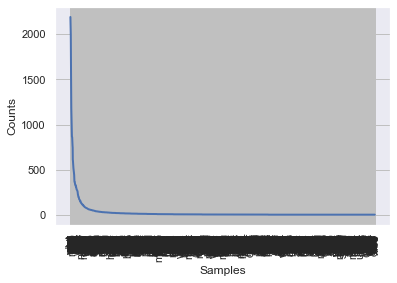

In [270]:
#across article distributions
articledist[3].plot()

In [271]:
#across articles, conditional prob distributions

articledist = nltk.ConditionalProbDist(articledist, nltk.ELEProbDist)

#print the most common 2 letter word
print(articledist[2].max())

#And its probability
print(articledist[2].prob(articledist[2].max()))

go
0.16703716703716703


In [272]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [354]:
#let's try this with just the one article
fulltext_df['tokenized_text'] = fulltext_df['text'].apply(lambda x: word_tokenize(x))

In [353]:

fulltext_df['normalized_tokens'] = fulltext_df['tokenized_text'].apply(lambda x: normalizeTokens(x))

fulltext_df['normalized_tokens_count'] = article_df['normalized_tokens'].apply(lambda x: len(x))

fulltext_df.head()


#across articles, conditional freq distributions

#.sum() adds together the lists from each row into a single list
articledist = nltk.ConditionalFreqDist(((len(w), w) for w in article_df['normalized_tokens'].sum()))

#print the number of words
print(articledist.N())

#across article distributions
articledist[3].plot()


AttributeError: 'float' object has no attribute 'lower'

In [ ]:
#across articles, conditional prob distributions

articledist = nltk.ConditionalProbDist(articledist, nltk.ELEProbDist)

#print the most common 2 letter word
print(articledist[2].max())

#And its probability
print(articledist[2].prob(articledist[2].max()))

In [ ]:
########
fulltext_df['normalized_tokens_POS'] = [spacy_pos(t) for t in fulltext_df['text']]

In [ ]:
articledist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in fulltext_df['normalized_tokens_POS'].sum())

In [ ]:
articledist_POStoWord['JJ']

In [ ]:
articledist_POStoWord['NN'].most_common(5)

In [ ]:
articledist_POStoWord['VB'].plot()

In [ ]:
articledist_POStoWord = nltk.ConditionalProbDist(articledist_POStoWord, nltk.ELEProbDist)

#print the most common nouns
print(articledist_POStoWord['NN'].max())

#And its probability
print(articledist_POStoWord['NN'].prob(articledist_POStoWord['NN'].max()))

In [ ]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(article_df['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("whitehouse_word_cloud.pdf", format = 'pdf')

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, perform POS tagging on a meaningful (but modest) subset of a corpus associated with your final project. Examine the list of words associated with at least three different parts of speech. Consider conditional associations (e.g., adjectives associated with nouns or adverbs with verbs of interest). What do these distributions suggest about your corpus?

In [254]:
# use article and get sentences
from nltk import tokenize

In [262]:
def sent_tokenize(word_list):
    doc = nlp(word_list)
    sentences = [sent.string.strip() for sent in doc.sents]
    return sentences

text = clean_sg[2]
text_token =  tokenize.sent_tokenize(text)

text_df = pd.DataFrame(text_token)

text_df = text_df.rename(columns={0:"sentences"})
text_df.drop([0])

sentences
1   For many years , my inclination to do somethin...
2   Eventually , I took the plunge of leaving the ...
3   Why do you think women's empowerment is import...
4   I believe that women can and should have a fun...
5   Women are the main victims of worldwide povert...
..                                                ...
67                To respect strength , never power .
68                             Above all , to watch .
69                            To try and understand .
70                               To never look away .
71                                        And never ,

[71 rows x 1 columns]

In [258]:
def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [265]:
text_df['POS_sents'] = text_df['sentences'].apply(lambda x: tag_sents_pos(x))

In [266]:
text_df['POS_sents'][1]

[[('F', 'NNP'), ('o', 'NNP'), ('r', 'NNP'), ('  ', '_SP')],
 [('m', 'NNP'),
  ('a', 'NN'),
  ('n', 'NN'),
  ('y', 'NN'),
  ('  ', '_SP'),
  ('y', 'NN'),
  ('e', 'NN'),
  ('a', 'NN'),
  ('r', 'NN'),
  ('s', 'NN'),
  ('  ', '_SP'),
  (',', ','),
  ('  ', '_SP'),
  ('m', 'NNP'),
  ('y', 'NN'),
  ('  ', '_SP')],
 [('i', 'NN'), ('n', 'NN'), ('c', 'NNP')],
 [('l', 'NN')],
 [('i', 'NN')],
 [('n', 'NN')],
 [('a', 'DT'), ('t', 'NN')],
 [('i', 'PRP'), ('o', 'NN')],
 [('n', 'CC'), ('  ', '_SP')],
 [('t', 'NN')],
 [('o', 'UH'), ('  ', '_SP')],
 [('d', 'NN')],
 [('o', 'NN'),
  ('  ', '_SP'),
  ('s', 'NN'),
  ('o', 'NN'),
  ('m', 'NN'),
  ('e', 'NN'),
  ('t', 'NN'),
  ('h', 'NN'),
  ('i', 'NN'),
  ('n', 'NN'),
  ('g', 'NN'),
  ('  ', '_SP')],
 [('m', 'NNP'), ('e', 'NN')],
 [('a', 'NN'), ('n', 'NNP')],
 [('i', 'NNP'),
  ('n', 'NN'),
  ('g', 'NNP'),
  ('f', 'XX'),
  ('u', 'NNP'),
  ('l', 'NNP'),
  ('  ', '_SP'),
  ('f', 'XX'),
  ('o', 'NN'),
  ('r', 'NN'),
  ('  ', '_SP'),
  ('t', 'NN'),
  ('h', 'NN')

In [252]:
tag = tag_sents_pos(article_df["Tokenized_Text"][0])

In [253]:
tag

[[('<', 'XX'), ('h', 'LS'), ('>', 'XX')],
 [('L', 'NN')],
 [('i', 'PRP'), ('S', 'VBP')],
 [('A', 'NNP'), ('B', 'NN')],
 [('l', 'NN'),
  ('o', 'NN'),
  ('g', 'NN'),
  ('1', 'CD'),
  ('1', 'CD'),
  ('/', 'SYM'),
  ('2', 'CD'),
  ('2', 'CD')],
 [('/', 'SYM'), ('1', 'CD'), ('2', 'CD'), ('G', 'NN'), ('i', 'NN')],
 [('n', 'NN')],
 [('k', 'NN')],
 [('g', 'NN')],
 [('o', 'NN'), ('W', 'NN'), ('o', 'NN')],
 [('w', 'NN')],
 [('I', 'NN')],
 [('t', 'NN')],
 [('i', 'PRP'), ('s', 'NN'), ('s', 'NN')],
 [('e', 'NN'), ('r', 'NN')],
 [('i', 'NN')],
 [('o', 'NN')],
 [('u', 'NN'), ('s', 'NN')],
 [('l', 'NN'), ('y', 'NN'), ('c', 'NN')],
 [('o', 'NN')],
 [('l', 'NN'), ('d', 'NN')],
 [('o', 'NN'), ('u', 'NN')],
 [('t', 'NN'), ('s', 'NN')],
 [('i', 'NN'), ('d', 'NN'), ('e', 'NN')],
 [('S', 'NN')],
 [('o', 'NN'),
  ('m', 'NN'),
  ('u', 'NN'),
  ('c', 'NN'),
  ('h', 'NN'),
  ('h', 'NN')],
 [('a', 'NN'),
  ('p', 'NN'),
  ('p', 'NN'),
  ('e', 'NN'),
  ('n', 'NN'),
  ('e', 'NN'),
  ('d', 'NN'),
  ('t', 'NN'),
  ('o

In [ ]:
tagged = nltk.pos_tag(text_df['sentences']) 

In [ ]:
countTarget = 'NN'

targetCounts = {}
for entry in redditTopScores['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1

sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions

## *Exercise 3*
Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order ngrams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?

We will begin with the nltk.collocations.BigramCollocationFinder class, which can be given raw lists of strings with the from_words() method. By default it only looks at continuous bigrams but there is an option (window_size) to allow skip-grams.

In [ ]:
article_df['normalized_tokens']

In [52]:
####
whBigrams = nltk.collocations.BigramCollocationFinder.from_words(whReleases['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(whBigrams.N))

AttributeError: 'list' object has no attribute 'sum'

In [ ]:

def bigramScoring(count, wordsTuple, total):
    return count

print(whBigrams.nbest(bigramScoring, 10))

In [ ]:
#give numeric ids to words
bigramScores = []

def bigramPrinting(count, wordsTuple, total):
    global bigramScores
    bigramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank

whBigrams.nbest(bigramPrinting, 10)
print('\n'.join(bigramScores[:10]))

In [ ]:
#compute the 𝜒2 , likelihood ratio, and pointwise mutual information statistics

bigram_measures = nltk.collocations.BigramAssocMeasures()
whBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]



In [ ]:
# trying other options for measuring significance
whBigrams.score_ngrams(bigram_measures.poisson_stirling)[:40]


In [ ]:
[s for s in dir(bigram_measures) if s[0] != '_']

In [ ]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
whTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(whReleases['normalized_tokens'].sum())
whTrigrams.score_ngrams(trigram_measures.student_t)[:20]

In [ ]:
Ngrams = nltk.ngrams(whReleases['normalized_tokens'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

In [ ]:
import gensim

bigram = gensim.models.Phrases(whReleases['normalized_tokens'])
texts = [bigram[line] for line in whReleases['normalized_tokens']]
texts[0]

## *Exercise 4*
In the cells immediately following, perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed.

In [ ]:
sent = nlp(clean_sg[2])

In [ ]:
for token in sent:
    print(token.text, token.ent_type_)

In [ ]:
for ent in sent.ents:
    print(ent.text, ent.label_)

In [ ]:
def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents


In [67]:
redditTopScores['classified_sents'] = redditTopScores['sentences'].apply(lambda x: tag_sents_ner(x))

NameError: name 'redditTopScores' is not defined

In [ ]:
redditTopScores['classified_sents']

In [ ]:
entityCounts = {}
for entry in redditTopScores['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                entityCounts[ent] += 1
            else:
                entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

In [ ]:
[x[0] for x in sortedEntities if x[1] == 2]

In [ ]:
nonObjCounts = {}
for entry in redditTopScores['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                continue
            elif ent in nonObjCounts:
                nonObjCounts[ent] += 1
            else:
                nonObjCounts[ent] = 1
sortedNonObj = sorted(nonObjCounts.items(), key = lambda x: x[1], reverse = True)
sortedNonObj[:10]

In [ ]:
OrgCounts = {}
for entry in redditTopScores['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                print(ent)

## <span style="color:red">Exercise 5.</span>

<span style="color:red">In the cells immediately following, parse a (modest) subset of your corpus of interest. How deep are the phrase structure and dependency parse trees nested? How does parse depth relate to perceived sentence complexity? What are five things you can extract from these parses for subsequent analysis? (e.g., nouns collocated in a noun phrase; adjectives that modify a noun; etc.) Capture these sets of things for a focal set of words (e.g., "Bush", "Obama", "Trump"). What do they reveal about the roles that these entities are perceive to play in the social world inscribed by your texts?

In [48]:
from spacy import displacy

doc = nlp(clean_sg[2])

displacy.render(doc, style='dep')


for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)

Project Project ROOT Project
Aim Aim ROOT Aim
women women dative facilitate
entrepreneurs entrepreneurs dobj facilitate
rural Rajasthan Rajasthan pobj in
India India appos Rajasthan
hygiene products products dobj sell
a mobile application application pobj through
who who nsubj is
your greatest source source attr is
inspiration inspiration pobj of
many years years pobj For
my inclination inclination nsubjpass limited
something something dobj do
monetary donations donations pobj to
various social causes causes pobj to
my heart heart pobj in
I I nsubj felt
the need need dobj felt
my services services dobj provide
I I nsubj took
the plunge plunge dobj took
the corporate world world dobj leaving
something something dobj do
society society pobj for
my knowledge and skill sets sets dobj share
others others pobj with
who who nsubj had
the opportunity opportunity dobj had
you you nsubj think
women's empowerment empowerment nsubj is
I I nsubj believe
women women nsubj can
a fundamental role role

In [43]:
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])
    

# quantmod 1015631 NUM []
# quantmod 1015631 NUM []
1015631 ROOT 1015631 NUM [#, #,  ]
   1015631 NUM []
Project ROOT Project PROPN []
Aim ROOT Aim PROPN [:, educate]
: punct Aim PROPN []
To aux facilitate VERB []
facilitate advcl educate VERB [To, women, entrepreneurs, ,]
women dative facilitate VERB []
entrepreneurs dobj facilitate VERB [in]
in prep entrepreneurs NOUN [Rajasthan]
rural amod Rajasthan PROPN []
Rajasthan pobj in ADP [rural, ,, India]
, punct Rajasthan PROPN []
India appos Rajasthan PROPN []
, punct facilitate VERB []
to aux educate VERB []
educate xcomp Aim PROPN [facilitate, to, and, sell, What, is, ?]
and cc educate VERB []
sell conj educate VERB [products, through]
hygiene compound products NOUN []
products dobj sell VERB [hygiene]
through prep sell VERB [application]
a det application NOUN []
mobile amod application NOUN []
application pobj through ADP [a, mobile,  ]
   application NOUN []
What dep educate VERB [or]
or cc What PRON []
who nsubj is AUX []
is conj ed

and cc Foundation PROPN []
the det Foundation PROPN []
Clinton compound Foundation PROPN []
Foundation conj Foundation PROPN [the, Clinton]
have aux stressed VERB []
stressed advcl lies VERB [As, organizations, have, ,]
, punct stressed VERB []
the det ability NOUN []
ability nsubj lies VERB [the, achieve]
to aux achieve VERB []
achieve acl ability NOUN [to, impact]
an det impact NOUN []
impact dobj achieve VERB [an]
lies ROOT lies VERB [stressed, ability, in, .]
in prep lies VERB [ability]
the det ability NOUN []
ability pobj in ADP [the, create]
to aux create VERB []
create acl ability NOUN [to, and, foster]
and cc create VERB []
foster conj create VERB [partnerships]
strong amod partnerships NOUN []
partnerships dobj foster VERB [strong]
. punct lies VERB []
In prep believe VERB [sense]
this det sense NOUN []
sense pobj In ADP [this]
, punct believe VERB []
we nsubj believe VERB []
believe ROOT believe VERB [In, ,, we, is, @, @]
that mark is AUX []
it nsubj is AUX []
is ccomp believ

is ccomp think VERB [empowerment, important]
important acomp is AUX []
? punct think VERB [ ]
   ? PUNCT []
Women nsubj are AUX []
are ccomp hold VERB [Women, core]
the det core NOUN []
core attr are AUX [the, of]
of prep core NOUN [society]
any det society NOUN []
society pobj of ADP [any]
- punct hold VERB []
they nsubj hold VERB []
hold ROOT hold VERB [are, -, they, aspects, together, ,, amidst, .]
all det aspects NOUN []
aspects dobj hold VERB [all]
together advmod hold VERB []
, punct hold VERB []
amidst prep hold VERB [difficulties]
all det difficulties NOUN []
difficulties pobj amidst ADP [all, and, disasters]
and cc difficulties NOUN []
disasters conj difficulties NOUN []
. punct hold VERB []
As prep become VERB [mothers]
mothers pobj As SCONJ [,, wives]
, punct mothers NOUN []
wives conj mothers NOUN [,, and, daughters]
, punct wives NOUN []
and cc wives NOUN []
daughters conj wives NOUN []
, punct become VERB []
they nsubj become VERB []
can aux become VERB []
become ROOT bec

begin ROOT begin VERB [journey, must, with, ., "]
with prep begin VERB [step]
a det step NOUN []
single amod step NOUN []
step pobj with ADP [a, single]
. punct begin VERB []
" punct begin VERB []
- punct Tzu PROPN []
Lao compound Tzu PROPN []
Tzu ROOT Tzu PROPN [-, Lao, ;, philosopher]
; punct Tzu PROPN []
an det philosopher NOUN []
ancient amod philosopher NOUN []
Chinese amod philosopher NOUN []
philosopher appos Tzu PROPN [an, ancient, Chinese,  , Project]
   philosopher NOUN []
Project conj philosopher NOUN []
Aim ROOT Aim PROPN [:, provide]
: punct Aim PROPN []
To aux provide VERB []
provide acl Aim PROPN [To, support, to, ,, through]
support dobj provide VERB [and, livelihood]
and cc support NOUN []
livelihood conj support NOUN []
to prep provide VERB [women]
displaced amod women NOUN []
women pobj to ADP [displaced, in]
in prep women NOUN [communities]
the det communities NOUN []
poor amod communities NOUN []
communities pobj in ADP [the, poor, of]
of prep communities NOUN [Man

. punct is AUX [ ]
   . PUNCT []
Why advmod think VERB []
do aux think VERB []
you nsubj think VERB []
think ROOT think VERB [Why, do, you, is, ?]
entrepreneurship nsubj is AUX []
is ccomp think VERB [entrepreneurship, way]
a det way NOUN []
great amod way NOUN []
way attr is AUX [a, great, empower]
to aux empower VERB []
empower relcl way NOUN [to, women]
women dobj empower VERB []
? punct think VERB [ ]
   ? PUNCT []
By prep providing VERB [engaging]
engaging pcomp By ADP [women]
women dobj engaging VERB [in]
in prep women NOUN [activities]
entrepreneurial amod activities NOUN []
activities pobj in ADP [entrepreneurial]
, punct providing VERB []
we nsubj providing VERB []
are aux providing VERB []
providing ROOT providing VERB [By, ,, we, are, them, with, .]
them dobj providing VERB []
with prep providing VERB [one]
one pobj with ADP [of]
of prep one NUM [skills]
the det skills NOUN []
essential amod skills NOUN []
skills pobj of ADP [the, essential, have]
they nsubj have AUX []
must

In [44]:
from spacy.symbols import nsubj, VERB

In [45]:
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)

{shows, reinforces, change, believe, believe, addresses, think, become, think, transcended, had, believe, think, change, can, think, believe, believe, felt, strive, offering, become, realize, struggle, face, hold, see, encompass, makes, stressed, beaten, believe, hope, change, suffice, provide, providing, produce, lies, makes, think, enhance, change, play, realize, think, think, begin, reinvest, work, exercise, took, change, find}


In [53]:
# tree - ordered sequence of tokens

root = [token for token in doc if token.head == token][0]
subject = list(root.lefts)[0]
for descendant in subject.subtree:
    assert subject is descendant or subject.is_ancestor(descendant)
    print(descendant.text, descendant.dep_, descendant.n_lefts,
            descendant.n_rights,
            [ancestor.text for ancestor in descendant.ancestors])


# quantmod 0 0 ['1015631']


In [56]:
span = doc[doc[4].left_edge.i : doc[4].right_edge.i+1]
with doc.retokenize() as retokenizer:
    retokenizer.merge(span)
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

# SYM quantmod 1015631
# SYM quantmod 1015631
1015631 NUM ROOT 1015631
  SPACE  1015631
Project PROPN ROOT Project
Aim PROPN ROOT Aim
: PUNCT punct Aim
To PART aux facilitate
facilitate VERB advcl educate
women NOUN dative facilitate
entrepreneurs NOUN dobj facilitate
in ADP prep entrepreneurs
rural ADJ amod Rajasthan
Rajasthan PROPN pobj in
, PUNCT punct Rajasthan
India PROPN appos Rajasthan
, PUNCT punct facilitate
to PART aux educate
educate VERB xcomp Aim
and CCONJ cc educate
sell VERB conj educate
hygiene NOUN compound products
products NOUN dobj sell
through ADP prep sell
a DET det application
mobile ADJ amod application
application NOUN pobj through
  SPACE  application
What PRON dep educate
or CCONJ cc What
who PRON nsubj is
is AUX conj educate
your DET poss source
greatest ADJ amod source
source NOUN attr is
of ADP prep source
inspiration NOUN pobj of
? PUNCT punct educate
  SPACE  ?
For ADP prep limited
many ADJ amod years
years NOUN pobj For
, PUNCT punct limited
my DET poss

you PRON nsubj change
change VERB ROOT change
the DET det world
world NOUN dobj change
for ADP prep change
women NOUN pobj for
and CCONJ cc women
girls NOUN conj women
? PUNCT punct change
  SPACE  ?
We PRON nsubj change
will VERB aux change
change VERB ROOT change
the DET det world
world NOUN dobj change
for ADP prep change
women NOUN pobj for
and CCONJ cc women
girls NOUN conj women
through ADP prep change
recognizing VERB pcomp through
and CCONJ cc change
being AUX conj change
sensitive ADJ acomp being
to ADP prep sensitive
their DET poss problems
problems NOUN pobj to
and CCONJ cc problems
issues NOUN conj problems
, PUNCT punct being
and CCONJ cc being
helping VERB conj being
them PRON nsubj realize
realize VERB ccomp helping
their DET poss capacity
true ADJ amod capacity
capacity NOUN dobj realize
. PUNCT punct change
  SPACE  .
What PRON dobj do
can VERB aux do
other ADJ amod people
people NOUN nsubj do
do AUX ROOT do
to PART aux help
help VERB xcomp do
disadvantaged ADJ xcomp h

seek VERB ROOT seek
joy NOUN dobj seek
in ADP prep seek
the DET det places
saddest ADJ amod places
places NOUN pobj in
. PUNCT punct seek
To PART aux pursue
pursue VERB ROOT pursue
beauty NOUN dobj pursue
to ADP prep pursue
its DET poss lair
lair NOUN pobj to
. PUNCT punct pursue
To PART aux simplify
never ADV neg simplify
simplify VERB ROOT simplify
what PRON nsubj is
is AUX ccomp simplify
complicated ADJ acomp is
or CCONJ cc is
complicate VERB conj is
what PRON nsubj is
is AUX ccomp complicate
simple ADJ acomp is
. PUNCT punct simplify
To PART aux respect
respect VERB advcl power
strength NOUN dobj respect
, PUNCT punct power
never ADV neg power
power NOUN ROOT power
. PUNCT punct power
Above ADP prep watch
all DET pobj Above
, PUNCT punct watch
to PART aux watch
watch VERB ROOT watch
. PUNCT punct watch
To PART aux try
try VERB ROOT try
and CCONJ cc try
understand VERB conj try
. PUNCT punct try
To PART aux look
never ADV neg look
look VERB ROOT look
away ADV advmod look
. PUNCT pun

In [98]:
def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [174]:
article_df['POS_sents'] = article_df['sentences'].apply(lambda x: tag_sents_pos(x))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'sentences'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-174-93c3da799cdb>", line 1, in <module>
    article_df['POS_sents'] = article_df['

TypeError: can only concatenate str (not "list") to str

In [ ]:
# dependencies
#1. 
news_weather = {}

for index, row in news_df.iterrows():
    text = ' '.join(row['Tokenized Texts'])
    news_weather[row['Title']] = ([], [])
    doc = nlp(text)
    for chunk in doc.noun_chunks:
        subject = 0
        object_ = 0
        # if the verb or the root of the sentence is kill
        if chunk.root.head.text == 'weather':
            # we find the subjects and objects around the word, and if it does exist, add it to the tuple
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                news_weather[row['Title']][0].append(subject)
            if object_ is not 0:
                news_weather[row['Title']][1].append(object_)

In [ ]:
#2. 
news_time = {}

for index, row in news_df.iterrows():
    text = ' '.join(row['Tokenized Texts'])
    news_time[row['Title']] = ([], [])
    doc = nlp(text)
    for chunk in doc.noun_chunks:
        subject = 0
        object_ = 0
        # if the verb or the root of the sentence is kill
        if chunk.root.head.text == 'weather':
            # we find the subjects and objects around the word, and if it does exist, add it to the tuple
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                news_time[row['Title']][0].append(subject)
            if object_ is not 0:
                news_time[row['Title']][1].append(object_)

                

In [ ]:
#3. 
news_death = {}

for index, row in news_df.iterrows():
    text = ' '.join(row['Tokenized Texts'])
    news_death[row['Title']] = ([], [])
    doc = nlp(text)
    for chunk in doc.noun_chunks:
        subject = 0
        object_ = 0
        # if the verb or the root of the sentence is kill
        if chunk.root.head.text == 'death':
            # we find the subjects and objects around the word, and if it does exist, add it to the tuple
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                news_death[row['Title']][0].append(subject)
            if object_ is not 0:
                news_death[row['Title']][1].append(object_)

In [ ]:
#4. 
news_economy = {}

for index, row in news_df.iterrows():
    text = ' '.join(row['Tokenized Texts'])
    news_economy[row['Title']] = ([], [])
    doc = nlp(text)
    for chunk in doc.noun_chunks:
        subject = 0
        object_ = 0
        # if the verb or the root of the sentence is kill
        if chunk.root.head.text == 'death':
            # we find the subjects and objects around the word, and if it does exist, add it to the tuple
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                news_economy[row['Title']][0].append(subject)
            if object_ is not 0:
                news_economy[row['Title']][1].append(object_)
                

In [ ]:
#5. 
news_rights = {}

for index, row in news_df.iterrows():
    text = ' '.join(row['Tokenized Texts'])
    news_rights[row['Title']] = ([], [])
    doc = nlp(text)
    for chunk in doc.noun_chunks:
        subject = 0
        object_ = 0
        # if the verb or the root of the sentence is kill
        if chunk.root.head.text == 'death':
            # we find the subjects and objects around the word, and if it does exist, add it to the tuple
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                news_rights[row['Title']][0].append(subject)
            if object_ is not 0:
                news_rights[row['Title']][1].append(object_)

## <span style="color:red">Exercise 5. Response: </span>

<span style="color:red">In the cells immediately following, parse a (modest) subset of your corpus of interest. How deep are the phrase structure and dependency parse trees nested? How does parse depth relate to perceived sentence complexity? What are five things you can extract from these parses for subsequent analysis? (e.g., nouns collocated in a noun phrase; adjectives that modify a noun; etc.) Capture these sets of things for a focal set of words (e.g., "Bush", "Obama", "Trump"). What do they reveal about the roles that these entities are perceive to play in the social world inscribed by your texts?</span>


I parsed an article from the news dataset about female entreprenuership in India. The phrases are XX deep. 

I looked at nouns collocated and adjecties that modified a noun.

I found that the XX. 

## <span style="color:red">*Exercise 6*</span>

<span style="color:red">Construct cells immediately below this that calculate the KL and $\chi^2$ divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better? 

<span style="color:red">**Stretch**: Calculate the <a "href=https://en.wikipedia.org/wiki/Jensen–Shannon_divergence" target="_blank">Jensen-Shannon Divergence</a> between your four corpora. What is the relationship between the KL and JS divergences?</span> 

In [359]:
pd.DataFrame("doc") 
doc1 = pd.DataFrame(clean_sg[1])


ValueError: DataFrame constructor not properly called!

In [356]:
doc1 = pd.DataFrame(clean_sg[1])
doc2 = pd.DataFrame(clean_sg[2])
doc3 = pd.DataFrame(clean_sg[3])
doc4 = pd.DataFrame(clean_sg[4])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-356-c701300c0e86>", line 1, in <module>
    doc1 = pd.DataFrame(clean_sg[0])
  File "/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 485, in __init__
    raise ValueError("DataFrame constructor not properly called!")
ValueError: DataFrame constructor not properly called!

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
 

ValueError: DataFrame constructor not properly called!

In [ ]:
for doc in docs:
    
    doc['tokenized_text'] = doc['text'].apply(lambda x: word_tokenize(x))
    doc['normalized_tokens'] = doc['tokenized_text'].apply(lambda x: normalizeTokens(x))


In [355]:
docs = [doc1, doc2, doc3, doc4]


for doc in docs:
        

text = clean_sg[2]
text_token =  tokenize.sent_tokenize(text)

text_df = pd.DataFrame(text_token)

text_df = text_df.rename(columns={0:"sentences"})
text_df.drop([0])

'\r\n'

In [63]:
# four corpora
# turn corpora into a df 


clean_sg[0]

kenReleases = getGithubFiles('https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Kennedy', maxFiles = 10)
kenReleases[:5]


kenReleases['tokenized_text'] = kenReleases['text'].apply(lambda x: word_tokenize(x))
kenReleases['normalized_tokens'] = kenReleases['tokenized_text'].apply(lambda x: normalizeTokens(x))

NameError: name 'getGithubFiles' is not defined

In [ ]:
whWords = set(whReleases['normalized_tokens'].sum())
kenWords = set(kenReleases['normalized_tokens'].sum())

#Change & to | if you want to keep all words
overlapWords = whWords & kenWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
overlapWordsDict['student']